# Downloading Data

Matthes, E. (2023). 16 Downloading Data. In *Python Crash Course* (3rd ed.). No Starch Press.

Resources: https://github.com/ehmatthes/pcc_3e/tree/main

Downloading datasets from online sources and working visualizations of that data.

## Index

* [The CSV file format](#the-csv-file-format)
    * [Parsing the CSV file Headers](#parsing-the-csv-file-headers)
    * [Printing the Headers and their positions](#printing-the-headers-and-their-positions)
    * [Extracting and reading Data](#extracting-and-reading-data)
    * [Plotting data in a temperature chard](#plotting-data-ina-temperature-chard)
    * [The datatime module](#the-datatime-module)
    * [Plotting dates](#plotting-dates)
    * [Ploting a second data series and shading the area between](#ploting-a-second-data-series-and-shading-the-area-between)
    * [Error Checking](#error-checking)
    * [Working with CSV Exercises](#working-with-csv-exercises)
* [Mapping Global Datasets: GeoJSON Format]

## The CSV file format

### Parsing the CSV File Headers



In [1]:
### Lets examine the first line of csv file, the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() # reading the file and we get a list of all lines in the file with 'splitlines()'

reader = csv.reader(lines) # process the first line of comma-separated valies and stores as a list
header_row = next(reader) # the 'next()' function show the next line in the file, starts for the beggining
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


### Printing the Headers and their positions


In [20]:
### Printing heach position of the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_2021_full.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

for index, column_header in enumerate(header_row): # Enumerate function returns both the index of each item and the value of each intem
    print(index, column_header)


0 STATION
1 NAME
2 DATE
3 AWND
4 PGTM
5 PRCP
6 TAVG
7 TMAX
8 TMIN
9 WDF2
10 WDF5
11 WSF2
12 WSF5
13 WT01
14 WT02
15 WT04
16 WT05
17 WT08
18 WT09


### Extracting and reading Data


In [3]:
### reading data from csv

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader] # new list 'highs' with a loop
# it beggins in the second line because previously we reed the headers row
# we pull the tdata from index 4 on each loop pass
# and we convert the data into integer with 'int()'

print(highs)



[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


### Plotting data ina temperature chard


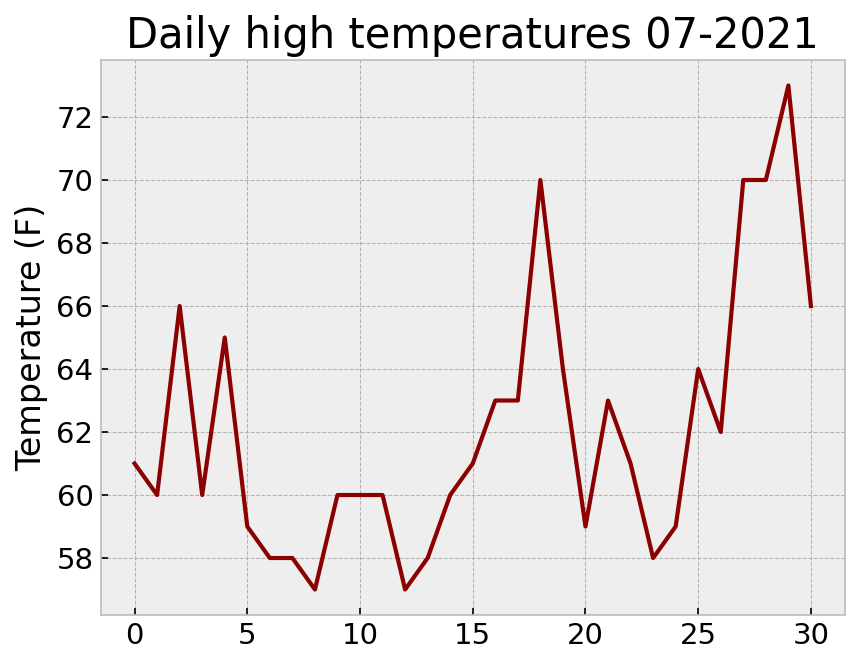

In [8]:
from pathlib import Path 
import csv 

import matplotlib.pyplot as plt

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader]

plt.style.use('bmh')
fig, ax = plt.subplots(dpi=150)
ax.plot(highs, color="darkred")

# Format plot
ax.set_title("Daily high temperatures 07-2021", fontsize=20)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=14)

plt.show()

Alternative:
```python
from pathlib import Path 

import pandas as pd
import plotly.express as px

path = Path("weather_data/sitka_weather_07-2021_simple.csv")

reader = pd.read_csv(path) # we use pandas to reed the csv

# High temperatures
fig = px.line(reader, x='DATE', y='TMAX', title="Daily high temperatures 07-2021", color_discrete_sequence=["darkred"], width=900)
# x and y are the labels from the csv file

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Temperature (°F)")
fig.update_legends(title_text="Temp")

fig.show()
```

### The datatime module

Date and Time Formatting Arguments from the datetime Module
```
Argument - Meaning
%A - Weekday name, such as Monday
%B - Month name, such as January
%m - Month, as a number (01 to 12)
%d - Day of the month, as a number (01 to 31)
%Y - Four-digit year, such as 2019
%y - Two-digit year, such as 19
%H - Hour, in 24-hour format (00 to 23)
%I - Hour, in 12-hour format (01 to 12)
%p - AM or PM
%M - Minutes (00 to 59)
%S - Seconds (00 to 61)
```

In [2]:
from datetime import datetime

first_date = datetime.strptime("2021-07-01", "%Y-%m-%d")

print(first_date) 

2021-07-01 00:00:00


### Plotting dates



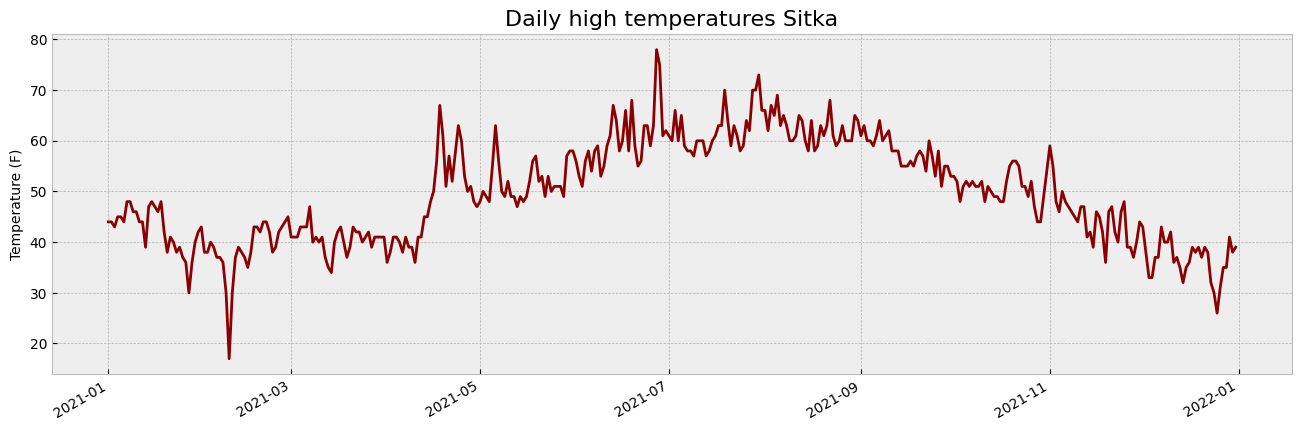

In [8]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

# path = Path("weather_data/sitka_weather_07-2021_simple.csv")
path = Path("weather_data/sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines() 

### Using two comprehensions with csv reader we need to read the csv once per comprehension
reader = csv.reader(lines) 
header_row = next(reader) 
dates = [datetime.strptime(row[2], "%Y-%m-%d") for row in reader] # converting data in row 2 to datetime object

reader2 = csv.reader(lines)
header_row2 = next(reader2)
highs = [int(row[4]) for row in reader2]

### Alternative to create dates and highs with a for loop
# dates, highs = [], []
# for row in reader:
#    current_date = datetime.strptime(row[2], '%Y-%m-%d')
#    high = int(row[4])
#    dates.append(current_date)
#    highs.append(high)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred")

# Format plot
ax.set_title("Daily high temperatures Sitka", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate() # This print the dates diagonally to prevent overlapping
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

### Ploting a second data series and shading the area between

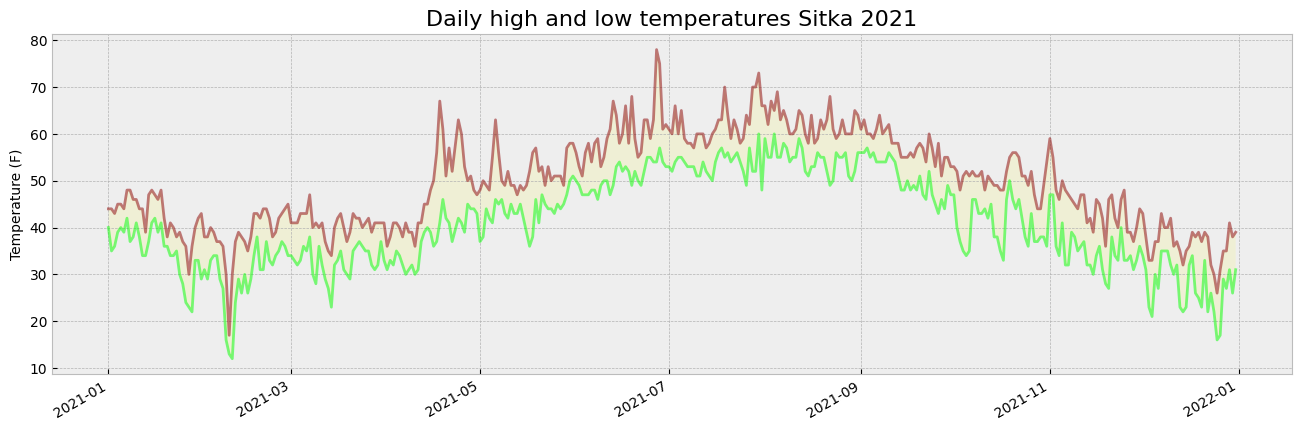

In [12]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

# path = Path("weather_data/sitka_weather_07-2021_simple.csv")
path = Path("weather_data/sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines() 

### Using two comprehensions with csv reader we need to read the csv once per comprehension
reader = csv.reader(lines) 
header_row = next(reader) 
dates = [datetime.strptime(row[2], "%Y-%m-%d") for row in reader] # converting data in row 2 to datetime object

reader2 = csv.reader(lines)
header_row2 = next(reader2)
highs = [int(row[4]) for row in reader2]

reader3 = csv.reader(lines)
header_row3 = next(reader3)
lows = [int(row[5]) for row in reader3]

### Alternative to create dates and highs with a for loop
# dates, highs = [], []
# for row in reader:
#    current_date = datetime.strptime(row[2], '%Y-%m-%d')
#    high = int(row[4])
#    dates.append(current_date)
#    highs.append(high)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred", alpha=0.5) # Alpha argument controls the colors transparency, 0=transparent and 1=opaque
ax.plot(dates, lows, color="lime", alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor="yellow", alpha=0.1) 
# Passing dates as x-value and highs/lows as y-values. Facecolor is the color for the shaded region

# Format plot
ax.set_title("Daily high and low temperatures Sitka 2021", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate() # This print the dates diagonally to prevent overlapping
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

### Error Checking

Missing data can result in exceptions that crash our programs, unless we handle them properly.

In [2]:
### Checking headers from new csv file

from pathlib import Path
import csv 
path = Path("weather_data/death_valley_2021_simple.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
for index, column_header in enumerate(header_row):
    print(index, column_header)

# headers are in diferent order, tmax and tmin now are 3 and 4

0 STATION
1 NAME
2 DATE
3 TMAX
4 TMIN
5 TOBS


In [4]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

path = Path("weather_data/death_valley_2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[3])
    lows = int(row[4])
    dates.append(current_date)
    highs.append(high)

# Generating plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred", alpha=0.5)
ax.plot(dates, lows, color="lime", alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor="yellow", alpha=0.1) 

# Format plot
ax.set_title("Daily high and low temperatures Sitka 2021", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate() # This print the dates diagonally to prevent overlapping
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

# will result in error because there are an empty temperature. Let's add try-except-else block.

ValueError: invalid literal for int() with base 10: ''

Missing value for 2021-05-04 00:00:00


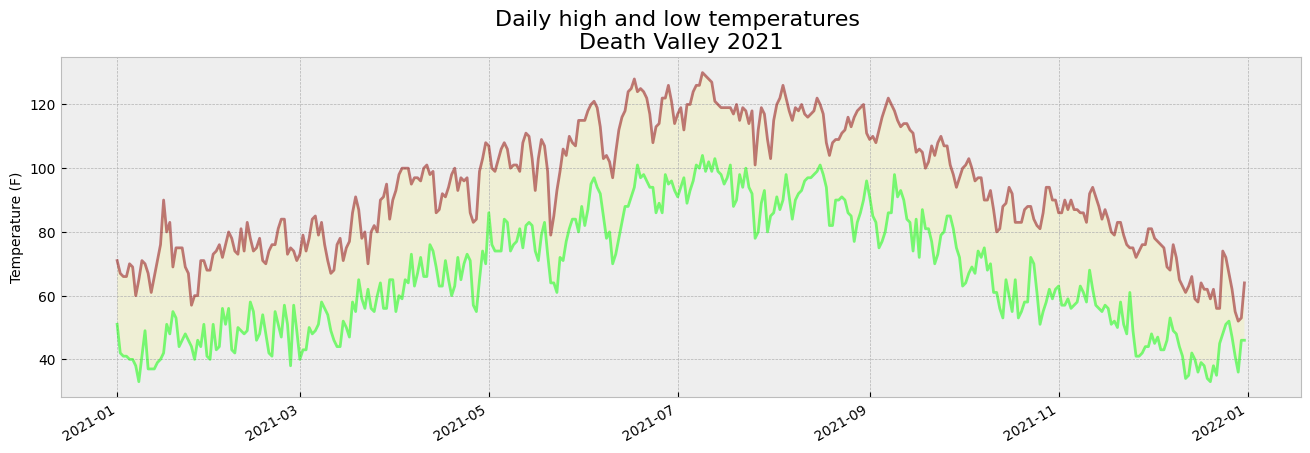

In [6]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

path = Path("weather_data/death_valley_2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError: # We use the same traceback error we saw the last time
        print(f"Missing value for {current_date}") # Every time python "read" a missing data will rise and error for that date
        # And will continue the loop processing the next row without beaking the program
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Generating plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred", alpha=0.5)
ax.plot(dates, lows, color="lime", alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor="yellow", alpha=0.1) 

# Format plot
ax.set_title("Daily high and low temperatures \nDeath Valley 2021", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

### Working with CSV Exercises

A: Using 'sitka_weather_2021_full.csv' there is a header called PRCP representing daily raingall amounts. Make a visualization with it. Repeat it with Death Valley.

B: Compare in one graph the temperatures of Sitka and Death Valley. You'll need to change y-axis scale because it needed to be identical.

C: Download other temperature csv and compare it with Sitka or Death Valley. (https://www.ncdc.noaa.gov/cdo-web) 

D: Now, use the header row to determine the indexes for TMIN and TMAX values, with that the program can work with Sitka or Death Valley csv.
Use the station name to automatically generate an appropriate title for your graph.

E: Generate other visualizations you're interested in.

Missing value in 2021-04-23 00:00:00
Missing value in 2021-09-16 00:00:00


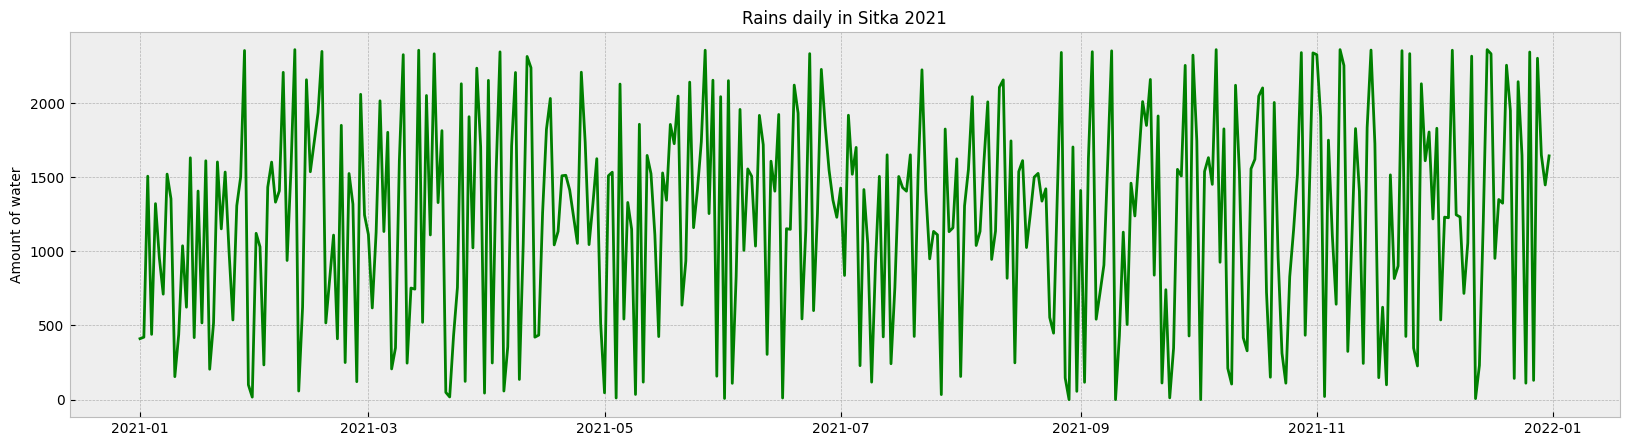

In [13]:
# A:

from pathlib import Path 
from datetime import datetime 
import matplotlib.pyplot as plt 
import csv 

path = Path("weather_data/sitka_weather_2021_full.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader) 

# print(header_row)

dates, rains = [], []
for row in reader:
    current_date = datetime.strptime(row[2], "%Y-%m-%d")
    try:
        rain = float(row[4]) # Check the csv, the row 4 are decimals (floats)
    except ValueError:
        print(f"Missing value in {current_date}")
    else:
        dates.append(current_date)
        rains.append(rain)

plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(dates, rains, color="green")

ax.set_title("Rains daily in Sitka 2021", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("Amount of water", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

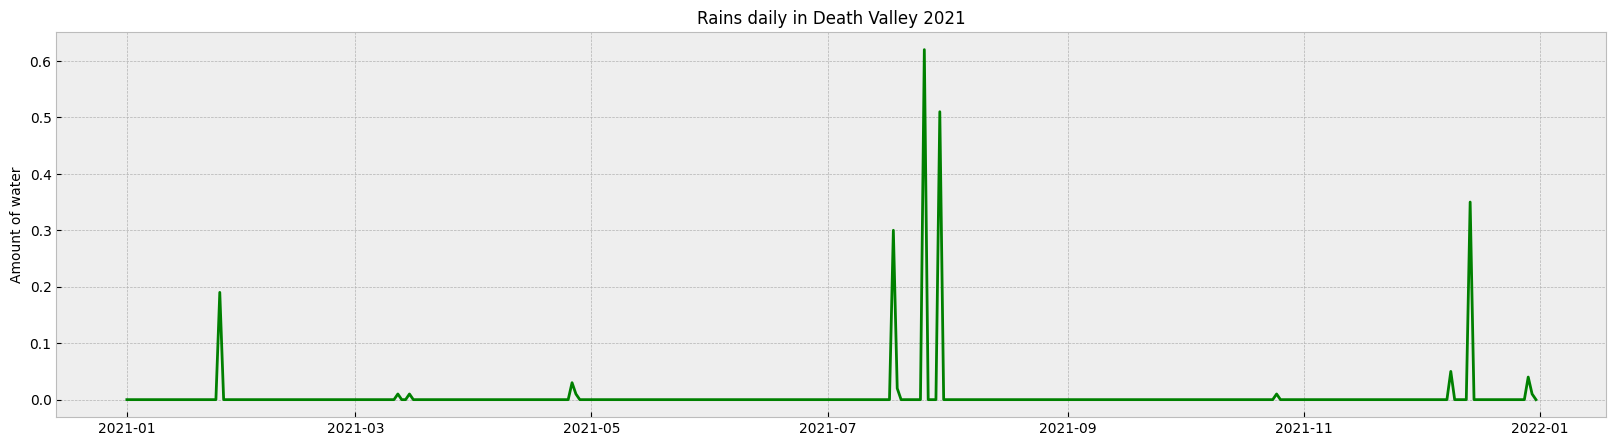

In [14]:
# A:

from pathlib import Path 
from datetime import datetime 
import matplotlib.pyplot as plt 
import csv 

path = Path("weather_data/death_valley_2021_full.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader) 

# print(header_row)

dates, rains = [], []
for row in reader:
    current_date = datetime.strptime(row[2], "%Y-%m-%d")
    try:
        rain = float(row[3]) # Check the csv, the row 4 are decimals (floats)
    except ValueError:
        print(f"Missing value in {current_date}")
    else:
        dates.append(current_date)
        rains.append(rain)

plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(dates, rains, color="green")

ax.set_title("Rains daily in Death Valley 2021", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("Amount of water", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

Missing value in 2021-04-23 00:00:00
Missing value in 2021-09-16 00:00:00


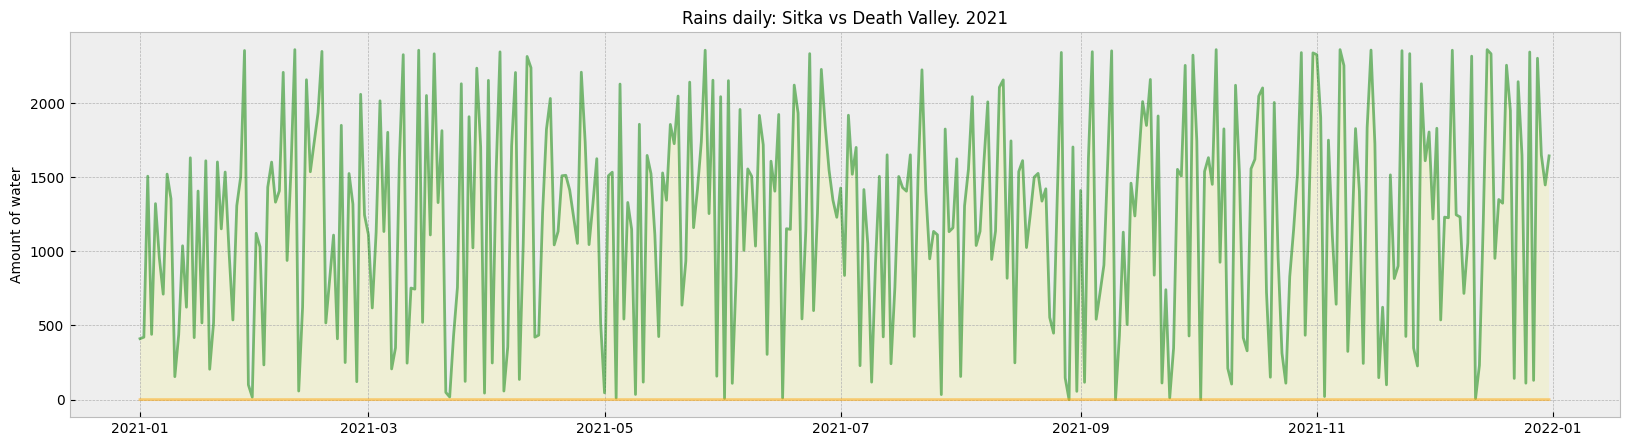

In [24]:
# B-Rains:

from pathlib import Path 
from datetime import datetime 
import matplotlib.pyplot as plt 
import csv 

path_s = Path("weather_data/sitka_weather_2021_full.csv")
lines_s = path_s.read_text().splitlines()

reader_s = csv.reader(lines_s)
header_row_s = next(reader_s) 

path_d = Path("weather_data/death_valley_2021_full.csv")
lines_d = path_d.read_text().splitlines()

reader_d = csv.reader(lines_d)
header_row_d = next(reader_d)

dates, rains_d, rains_s = [], [], []
for row in reader_s:
    current_date = datetime.strptime(row[2], "%Y-%m-%d")
    try:
        rain_s = float(row[4]) # Check the csv, the row 4 are decimals (floats)
    except ValueError:
        print(f"Missing value in {current_date}")
    else:
        dates.append(current_date)
        rains_s.append(rain_s)

for row in reader_d:
    try:
        rain_d = float(row[3])
    except ValueError:
        continue
    else:
        rains_d.append(rain_d)

rains_d_t = rains_d[:363] # x and y need to hace the same amount of entries
rains_s_t = rains_s[:363]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(dates, rains_s_t, color="green", alpha=0.5)
ax.plot(dates, rains_d_t, color="orange", alpha=0.5)
ax.fill_between(dates, rains_s_t, rains_d_t, facecolor="yellow", alpha=0.1)

ax.set_title("Rains daily: Sitka vs Death Valley. 2021", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("Amount of water", fontsize=10)
ax.tick_params(labelsize=10, )

plt.show()

Missing value in 2021-04-23 00:00:00


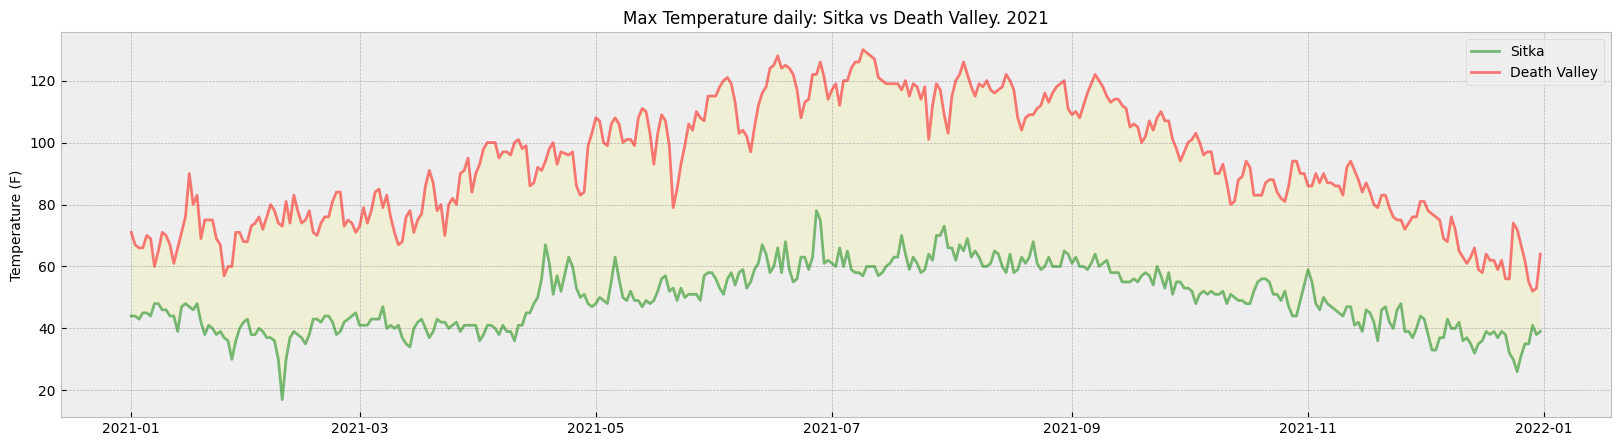

In [30]:
# B-Temperature:

from pathlib import Path 
from datetime import datetime 
import matplotlib.pyplot as plt 
import csv 

path_s = Path("weather_data/sitka_weather_2021_full.csv")
lines_s = path_s.read_text().splitlines()

reader_s = csv.reader(lines_s)
header_row_s = next(reader_s) 

path_d = Path("weather_data/death_valley_2021_full.csv")
lines_d = path_d.read_text().splitlines()

reader_d = csv.reader(lines_d)
header_row_d = next(reader_d)

dates, rains_d, rains_s = [], [], []
for row in reader_s:
    current_date = datetime.strptime(row[2], "%Y-%m-%d")
    try:
        rain_s = int(row[7]) # Check the csv, the row 4 are decimals (floats)
    except ValueError:
        print(f"Missing value in {current_date}")
    else:
        dates.append(current_date)
        rains_s.append(rain_s)

for row in reader_d:
    try:
        rain_d = int(row[6])
    except ValueError:
        continue
    else:
        rains_d.append(rain_d)

rains_d_t = rains_d[:364]
rains_s_t = rains_s[:364]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(dates, rains_s_t, color="green", alpha=0.5, label="Sitka")
ax.plot(dates, rains_d_t, color="red", alpha=0.5, label="Death Valley")
ax.fill_between(dates, rains_s_t, rains_d_t, facecolor="yellow", alpha=0.1)
plt.legend() # Adding labels (leyend) to see what line is each. Needs 'label' in the plots

ax.set_title("Max Temperature daily: Sitka vs Death Valley. 2021", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

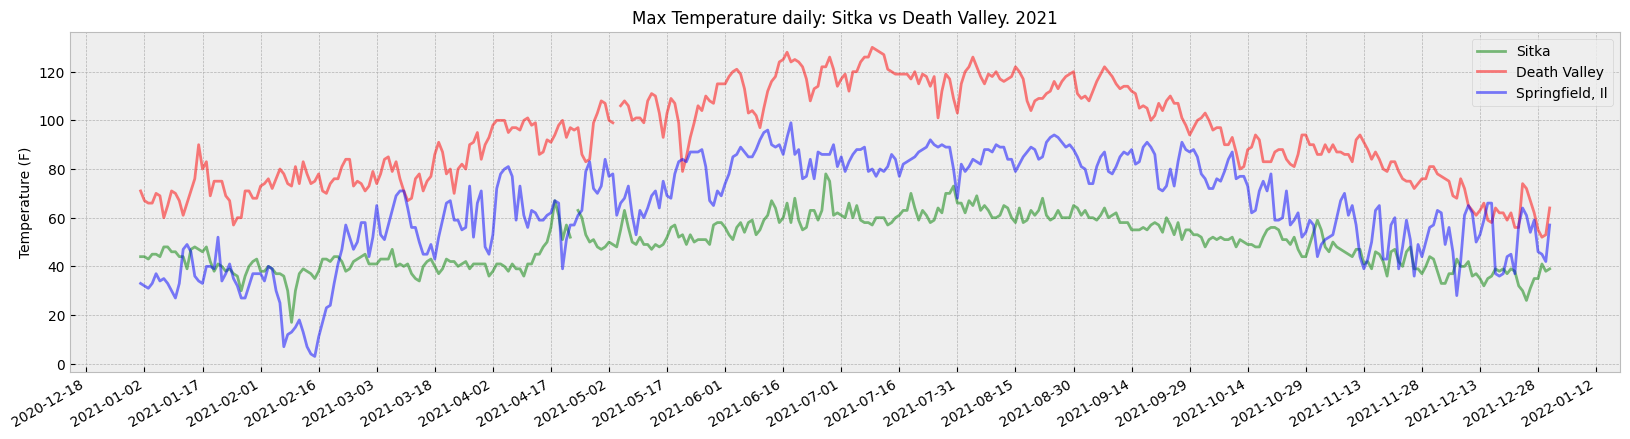

In [11]:
# C:

from pathlib import Path 
from datetime import datetime 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandas as pd

path_s = Path("weather_data/sitka_weather_2021_full.csv")

reader_s = pd.read_csv(path_s, parse_dates=['DATE'], date_format='%Y-%m-%d') # We configure "DATE" column as dates
# The argument "date_format" may not be necessary, 'Pandas' could infer the date format in the column if it is consistent. 

path_d = Path("weather_data/death_valley_2021_full.csv")

reader_d = pd.read_csv(path_d, parse_dates=['DATE'])

path_i = Path("weather_data/springfiel_weather_2021_simple.csv")

reader_i = pd.read_csv(path_i, parse_dates=['DATE'])

plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(reader_s["DATE"], reader_s["TMAX"], color="green", alpha=0.5, label="Sitka")
ax.plot(reader_d["DATE"], reader_d["TMAX"], color="red", alpha=0.5, label="Death Valley")
ax.plot(reader_i["DATE"], reader_i["TMAX"], color="blue", alpha=0.5, label="Springfield, Il")
plt.legend() # Adding labels (leyend) to see what line is each. Needs 'label' in the plots

ax.set_title("Max Temperature daily: Sitka vs Death Valley. 2021", fontsize=12)
ax.set_xlabel("", fontsize=10)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

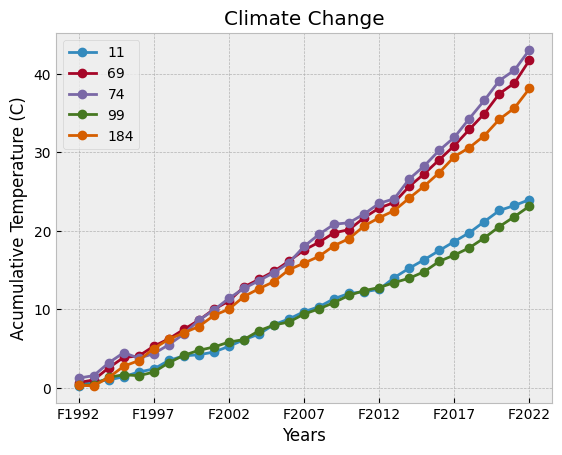

In [9]:
from pathlib import Path 
import matplotlib.pyplot as plt 
import pandas as pd

path = Path("weather_data/climate_change_indicators.csv")

data = pd.read_csv(path)

datfra = pd.DataFrame(data)

countries = ['Australia', 'France', 'Germany', 'Japan', 'Spain',]
datfra_coun = datfra[datfra['Country'].isin(countries)]

years = ['F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999',
    'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007',
    'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015',
    'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']

datfra_acu = datfra_coun[years].T.cumsum()

datfra_acu.plot(marker="o", linestyle="-")

plt.style.use("bmh")
plt.xlabel("Years")
plt.ylabel("Acumulative Temperature (C)")
plt.title("Climate Change")
plt.grid(True)

plt.show()

In [8]:
from pathlib import Path
import pandas as pd
import plotly.express as px

path = Path("weather_data/climate_change_indicators.csv")
data = pd.read_csv(path)
datfre = pd.DataFrame(data)

years = ['F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 
         'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
         'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']

countries = ['Australia', 'France', 'Germany', 'Japan', 'Spain',]

datfre_filt = datfre[datfre["Country"].isin(countries)] # Filtering the full dataset with selected countries

datfre_acu = datfre_filt[years].T.cumsum() # We need to acumulate the values of temperature change with '.cumsum()'
# and convert the table transforming columns in rows and vice versa. That transformation is with '.T'

datfre_acu = datfre_acu.rename(columns={11:"Australia",69:"France",74:"Germany",99:"Japan",184:"Spain"})
# We change our colums header to identified the countries

fig = px.line(datfre_acu, x=datfre_acu.index, y=countries, title="Climate Change per Country", 
    markers=True, labels={
        "value":"Temperature (C) Increase", 
        "index":"Year",
        "variable":"Country"
        })
# Here, 'x=datfre_acu.index' is refering to 'years' list, because we change the columns and rows
# and y=countries has to contain a list with the columns names

fig.show()

# print(datfre_acu)